In [245]:
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - - - 
import EstrategiaParticionado as ep
import Datos as datos
import Clasificador as cl
# - - - - - - - - - - - - - - - - - - - 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import numpy as np

datasetGerman = datos.Datos(nombreFichero="../datos/german.data")
datasetBalloons = datos.Datos(nombreFichero="../datos/balloons.data")
datasetTicTacToe = datos.Datos(nombreFichero="../datos/tic-tac-toe.data")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# APARTADO 1
### Estrategia Particionado (Validacion Simple)

In [250]:
# porcentaje de entradas para training
porcentaje = 0.7

# numero de particiones deseadas siguiendo la estrategia de VS
numeroParticiones = 1

# creamos una estrategia de Validacion Simple
estrategiaBalloons = ep.ValidacionSimple(porcentaje,numeroParticiones)
estrategiaTicTacToe = ep.ValidacionSimple(porcentaje,numeroParticiones)


# obtencion de particiones
particionesVS = estrategiaBalloons.creaParticiones(datasetBalloons)

print(" - - - - - - - Particionado Simple (balloons.data) - - - - - - - ")
# print
for particion in particionesVS:
    particion.print()

# obtencion de particiones
particionesVS = estrategiaTicTacToe.creaParticiones(datasetTicTacToe)

print("- - - - - - - Particionado Simple (tic-tac-toe.data)- - - - - - - ")
# print
for particion in particionesVS:
    particion.print()


 - - - - - - - Particionado Simple (balloons.data) - - - - - - - 
Indices Train: [ 6  8 19  0  1 16  9 12 17 18  3  7 10 11]
Indices Test: [ 2 15 13  5  4 14]

- - - - - - - Particionado Simple (tic-tac-toe.data) - - - - - - - 
Indices Train: [717  94 634 411  77 315 761 841 357 929 135 710 413 353 178 666 137 884
 253 330  40 405 618 360 703  70 704 409 716 754 484  25 680 669 877 245
 815  49 865 547 608 106 938 572 161 394 544 626 288  53 585 627 378 190
 822 645 482 173 850 561 542 465  45 869 726 737 349 862 533 916 772 246
 609 396 381 599 184 516 481 226 303 709 296  56 196 125 951 919 914 934
 132 921 181 948 687 596 256 170  20 437 649 213 434 799 290 713 895 444
 250 424 928 749 725  43 778  16 463 786 306 120 263 711 558 523 894 843
 545 700 114 252 735 297 447 379 679 422 197 148 154 748  27 123 507  62
 832 848 389 272 417 212 491 874 883 386 828 210  36 823 783  73 923 745
 871 672 423 715 506 375 899 195 639  38 219 108  81 859 182 192  71  54
 856 751 151 138 127 382 20

### Estrategia Particionado (Validacion Cruzada)

In [255]:
k = 5

# creamos una estrategia de Validacion Cruzada
estrategiaBalloons = ep.ValidacionCruzada(k)
estrategiaTicTacToe = ep.ValidacionCruzada(k)

# obtencion de particiones
particionesVS = estrategiaBalloons.creaParticiones(datasetBalloons)

print("- - - - - - - Particionado K-fold (balloons.data) - - - - - - - - -")
# print
for particion in particionesVS:
    particion.print()
    
# obtencion de particiones
particionesVS = estrategiaTicTacToe.creaParticiones(datasetTicTacToe)

print("- - - - - - -  Particionado K-fold (tic-tac-toe.data) - - - - - - - -")
# print demasiado extenso
print("print demasidado extenso")
#for particion in particionesVS:
#    particion.print()

- - - - - - - Particionado K-fold (balloons.data) - - - - - - - - -
Indices Train: [15  7  8  0 17  2 11 19 14  3 12  6  9 10 16  4]
Indices Test: [ 5  1 13 18]

Indices Train: [ 5  1 13 18 17  2 11 19 14  3 12  6  9 10 16  4]
Indices Test: [15  7  8  0]

Indices Train: [ 5  1 13 18 15  7  8  0 14  3 12  6  9 10 16  4]
Indices Test: [17  2 11 19]

Indices Train: [ 5  1 13 18 15  7  8  0 17  2 11 19  9 10 16  4]
Indices Test: [14  3 12  6]

Indices Train: [ 5  1 13 18 15  7  8  0 17  2 11 19 14  3 12  6]
Indices Test: [ 9 10 16  4]

- - - - - - -  Particionado K-fold (tic-tac-toe.data) - - - - - - - -
print demasidado extenso


### Bootstrap

In [257]:
numParticiones = 3
# creamos una estrategia de Validacion Bootstrap
estrategiaBalloons = ep.ValidacionBootstrap(numParticiones)
estrategiaTicTacToe = ep.ValidacionBootstrap(numParticiones)


# obtencion de particiones
particiones = estrategiaBalloons.creaParticiones(datasetBalloons)

print("- - - - - - - Particionado Bootstrap (balloons.data) - - - - - - - - -")
# print
for particion in particiones:
    particion.print()
    
# obtencion de particiones
particiones = estrategiaTicTacToe.creaParticiones(datasetTicTacToe)

print("- - - - - - -  Particionado Bootstrap (tic-tac-toe.data) - - - - - - - -")
# print demasiado extenso
print("print demasidado extenso")
#for particion in particionesVS:
#    particion.print()

- - - - - - - Particionado Bootstrap (balloons.data) - - - - - - - - -
Indices Train: [19 18  7 11  4  9  2 17 16 12 14 17  6  4 10  8  2 12  1 16]
Indices Test: [13  5 15  0  3]

Indices Train: [ 7  5 17 10  2 18  0  1 19  1 10 16 14  7  2  0  6  2  1 19]
Indices Test: [ 3  9 15 12 11  4  8 13]

Indices Train: [ 9  0 17 10 14 13 12 14  1  6 17  2 11  1 10 13 10  0 14  3]
Indices Test: [19  4  5  7  8 18 15 16]

- - - - - - -  Particionado Bootstrap (tic-tac-toe.data) - - - - - - - -
print demasidado extenso


# Apartado 2
### Naive Bayes

In [283]:
# atrubutos estrategias particionado
porcentaje = 0.95 #porcentaje de entradas para training
numeroParticiones = 7 #numero de particiones deseadas siguiendo la estrategia de VS
k = 5

estrategiaGerman = ep.ValidacionSimple(porcentaje,numeroParticiones)
estrategiaTicTacToe = ep.ValidacionSimple(porcentaje,numeroParticiones)

#estrategia = ep.ValidacionCruzada(k)
#estrategia = ep.ValidacionBootstrap(numeroParticiones)

# clasificador Naive Bayes
clasificador = cl.ClasificadorNaiveBayes()

print("- - - - - - - - - German.data - - - - - - - - - - ")

# errores
porcentajesError = clasificador.validacion(estrategiaGerman,datasetGerman,clasificador)

# aciertos
porcentajesAciertos = []
for pe in porcentajesError:
    pa = 1-pe
    porcentajesAciertos.append(pa)

print("Tasa errores:  " +str(porcentajesError))
print("\nTasa aciertos:   " +str(porcentajesAciertos))
print("\nPromedio error: "+str(np.mean(porcentajesError)))
print("\nDesviación típica error: "+str(np.std(porcentajesError)) )

print("\n- - - - - - - - - TicTacToe.data - - - - - - - - - - ")

# errores
porcentajesError = clasificador.validacion(estrategiaTicTacToe,datasetTicTacToe,clasificador)

# aciertos
porcentajesAciertos = []
for pe in porcentajesError:
    pa = 1-pe
    porcentajesAciertos.append(pa)
    
print("Tasa errores:  " +str(porcentajesError))
print("\nTasa aciertos:   " +str(porcentajesAciertos))
print("\nPromedio error: "+str(np.mean(porcentajesError)))
print("\nDesviación típica error: "+str(np.std(porcentajesError)) )



- - - - - - - - - German.data - - - - - - - - - - 
Tasa errores:  [0.22, 0.3, 0.22, 0.26, 0.28, 0.22, 0.22]

Tasa aciertos:   [0.78, 0.7, 0.78, 0.74, 0.72, 0.78, 0.78]

Promedio error: 0.245714285714

Desviación típica error: 0.0315581743348

- - - - - - - - - TicTacToe.data - - - - - - - - - - 
Tasa errores:  [0.3617021276595745, 0.2765957446808511, 0.3404255319148936, 0.40425531914893614, 0.425531914893617, 0.2553191489361702, 0.3617021276595745]

Tasa aciertos:   [0.6382978723404256, 0.7234042553191489, 0.6595744680851063, 0.5957446808510638, 0.574468085106383, 0.7446808510638299, 0.6382978723404256]

Promedio error: 0.346504559271

Desviación típica error: 0.0576707172067


# Apartado 3
### Scikit-Learn

In [302]:
numParticiones = 7

# Transformamos la matriz de datos al formato Scikit-Learn
datosScikit = []
listScikit = []
datos = [datasetGerman, datasetTicTacToe]

# Reemplazo de atributos nominales por su codigo numerico
for set in datos:
    listScikit = []
    for fila in set.datos:
        x = []
        for i,col in enumerate(fila):
            if set.nominalAtributos[i] == True:
                x.append(float(set.diccionarios[i][col]))
            else:
                x.append(float(col))            
        listScikit.append(x)
    datosScikit.append(np.array(listScikit))
    

for i, set in enumerate(datosScikit):
    encAtributos = preprocessing.OneHotEncoder(categorical_features=datos[i].nominalAtributos[:-1],sparse=False)

    # transfomracion al formato scikit-learn
    X = encAtributos.fit_transform(set[:,:-1])
    Y = set[:,-1]

    # separamos en training test y training data segun la validacion simple 
    # especificamos test_size

    porcentajesError = []
    for j in range(numParticiones):
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=j)

        # Naive Bayes
        clf = GaussianNB()
        clf.fit(X_train,y_train)
        y_predicted = clf.predict(X_test)

        # calculamos el porcentaje de acierto del clasificador
        suma = 0.0
        for k, pred in enumerate(y_predicted):
            if pred != y_test[k]:
                suma = 1 + suma

        porcentajeError = suma / len(y_test)
        porcentajesError.append(porcentajeError)

    # aciertos
    porcentajesAciertos = []
    for pe in porcentajesError:
        pa = 1-pe
        porcentajesAciertos.append(pa)

    # resultados
    print("Tasa errores:  " +str(porcentajesError))
    print("\nTasa aciertos:   " +str(porcentajesAciertos))
    print("\nPromedio error: "+str(np.mean(porcentajesError)))
    print("\nDesviación típica error: "+str(np.std(porcentajesError)))
        

Tasa errores:  [0.295, 0.305, 0.275, 0.285, 0.31, 0.3025, 0.26]

Tasa aciertos:   [0.7050000000000001, 0.6950000000000001, 0.725, 0.7150000000000001, 0.69, 0.6975, 0.74]

Promedio error: 0.290357142857

Desviación típica error: 0.0167133699383
Tasa errores:  [0.3307291666666667, 0.3333333333333333, 0.3541666666666667, 0.296875, 0.3203125, 0.3151041666666667, 0.3307291666666667]

Tasa aciertos:   [0.6692708333333333, 0.6666666666666667, 0.6458333333333333, 0.703125, 0.6796875, 0.6848958333333333, 0.6692708333333333]

Promedio error: 0.325892857143

Desviación típica error: 0.0164365491327


### Comparativa:
Se pueden observar unos resultados parecidos. Hay una diferencia de 0.05 entre los promedios de error.
Este resultado es el esperado ya que Naive Bayes es meramente un cálculo. El uso de distintas particiones es lo que produce la pequeña diferencia en los resultados. Si seleccionamos la misma partición el resultado es el mismo.

# Apartado 4
### Evaluación de hipótesis mediante Análisis ROC

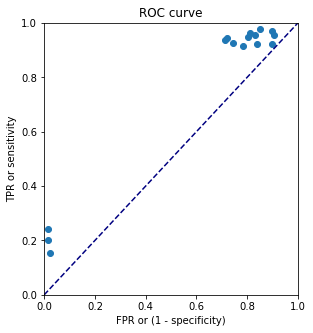

In [270]:
# usaremos validacion simple para probar el analisis ROC

porcentaje = 0.80
numeroParticiones = 10

estrategia = ep.ValidacionSimple(porcentaje,numeroParticiones)

clasificador = cl.ClasificadorNaiveBayes()

errores = clasificador.validacion(estrategia,dataset,clasificador)

clasificador.plotROC()

